David Garza Safi | 580768 | IRSI

# Regresion logistica y validacion cruzada


Objetivo:
    Proyecto en Jupyter Notebook aplica técnicas de modelado predictivo usando regresión logística sobre una base de datos. La base de datos utilizada es el archivo de nombre “Hitters.csv”, que contiene información sobre jugadores de béisbol. La base de datos cuenta con 322 registros y 20 variables, incluyendo estadísticas de rendimiento y el salario de los jugadores. Se siguen los siguientes conceptos clave en el proyecto:

- División de datos: Separación en conjuntos de entrenamiento y prueba (80/20) con balance de clases.
- Validación cruzada: Evaluación del rendimiento del modelo con validación cruzada.
- Entrenamiento y evaluación: Ajuste del modelo de regresión logística, generación de predicciones y análisis con métricas como exactitud, sensibilidad y especificidad bajo distintos umbrales.
- Análisis de rendimiento: Cálculo y visualización de la curva ROC junto con el valor AUC.
- Interpretación de resultados: Análisis del impacto de cada variable en la predicción según los coeficientes del modelo.


Proporciones en datos originales:
HighSalary
0    0.509506
1    0.490494
Name: proportion, dtype: float64
Proporciones en entrenamiento:
HighSalary
0    0.509524
1    0.490476
Name: proportion, dtype: float64
Proporciones en prueba:
HighSalary
0    0.509434
1    0.490566
Name: proportion, dtype: float64
Exactitud media en validación cruzada: 0.7476

Umbral: 0.5
Exactitud: 0.5849, Sensibilidad: 0.4231, Especificidad: 0.7407
Matriz de confusión:
[[20  7]
 [15 11]]

Umbral: 0.6
Exactitud: 0.5660, Sensibilidad: 0.2692, Especificidad: 0.8519
Matriz de confusión:
[[23  4]
 [19  7]]

Umbral: 0.4
Exactitud: 0.5849, Sensibilidad: 0.5769, Especificidad: 0.5926
Matriz de confusión:
[[16 11]
 [11 15]]


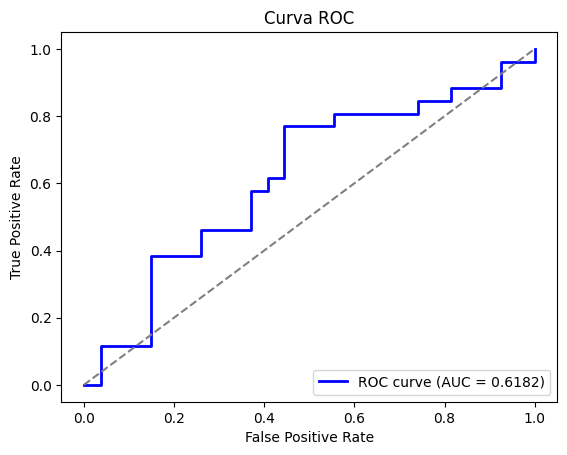

Coeficientes del modelo:
  Feature  Coefficient
1    Hits     1.208783
4     RBI     0.415655
2   HmRun    -0.017727
3    Runs    -0.173980
0   AtBat    -0.213861


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report

# Cargar los datos
data = pd.read_csv("Hitters.csv")

# Mostrar las primeras filas para inspección
data.head()

# Definir la variable de salida binaria (Ejemplo: salario mayor a la mediana)
data = data.dropna()  # Eliminar valores nulos
threshold = data['Salary'].median()
data['HighSalary'] = (data['Salary'] > threshold).astype(int)
data = data.drop(columns=['Salary'])  # Eliminar la columna original de salario

# Dividir en entrenamiento y prueba (80/20) manteniendo el balance de clases
X = data.drop(columns=['HighSalary'])
y = data['HighSalary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Imprimir proporciones
def print_class_proportions(y, label):
    class_counts = y.value_counts(normalize=True)
    print(f"Proporciones en {label}:\n{class_counts}")

print_class_proportions(y, "datos originales")
print_class_proportions(y_train, "entrenamiento")
print_class_proportions(y_test, "prueba")

# Seleccionar 5 características de interés
selected_features = X_train.columns[:5]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Validación cruzada con regresión logística
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression()
scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
print(f"Exactitud media en validación cruzada: {scores.mean():.4f}")

# Entrenar el modelo con todos los datos de entrenamiento
model.fit(X_train_scaled, y_train)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilidades de la clase 1

# Evaluación con distintos umbrales
thresholds = [0.5, 0.6, 0.4]
for thr in thresholds:
    y_pred = (y_prob >= thr).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    print(f"\nUmbral: {thr}")
    print(f"Exactitud: {accuracy:.4f}, Sensibilidad: {sensitivity:.4f}, Especificidad: {specificity:.4f}")
    print("Matriz de confusión:")
    print(cm)

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Interpretación de coeficientes
coefficients = pd.DataFrame({'Feature': selected_features, 'Coefficient': model.coef_[0]})
print("Coeficientes del modelo:")
print(coefficients.sort_values(by='Coefficient', ascending=False))